# Identifying and Removing Outliers

Removing outliers is an important step in data preprocessing and analysis to ensure that extreme or erroneous data points do not unduly influence the results of your analysis. There are various methods and libraries available to help identify and handle outliers. Here's more information on removing outliers, including algorithms, use cases, limitations, and alternative libraries:

## Methods for Removing Outliers:

1. **Z-Score Method:** This method involves calculating the z-score for each data point and removing those that fall above or below a certain threshold. The z-score measures how many standard deviations a data point is away from the mean. Generally, data points with z-scores beyond a threshold (often 2 to 3) are considered outliers.

2. **IQR (Interquartile Range) Method:** The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data. Data points outside a specified range (often defined as 1.5 times the IQR) are considered outliers and can be removed.

3. **Visual Inspection:** Sometimes, outliers can be identified by visually inspecting plots such as box plots or scatter plots. Data points that deviate significantly from the general pattern may be outliers.

## Use Cases and Limitations:

- **Z-Score Method:** The z-score method assumes that the data follows a normal distribution. It may not work well for non-normally distributed data. It is best suited for cases where you have a good understanding of the data distribution.

- **IQR Method:** The IQR method is robust to outliers and does not rely on assumptions about the distribution. It is particularly useful when dealing with skewed data or data with heavy tails.

- **Visual Inspection:** Visual inspection is a useful exploratory tool to quickly identify potential outliers. However, it may not be precise for large datasets or complex relationships.

## Libraries for Identifying and Handling Outliers:

1. **SciPy:** The SciPy library provides statistical functions, including methods for calculating z-scores and percentiles. The `scipy.stats.zscore` and `scipy.stats.iqr` functions can be used for outlier detection.

2. **Scikit-learn:** While Scikit-learn is primarily a machine learning library, it offers tools for preprocessing data, including outlier detection. The `sklearn.ensemble.IsolationForest` algorithm is commonly used to detect outliers based on isolation.

3. **PyOD:** The Python Outlier Detection (PyOD) library specializes in outlier detection algorithms. It provides a wide range of algorithms, including Isolation Forest, Local Outlier Factor (LOF), and more.

4. **Statsmodels:** Statsmodels is a library for statistical modeling and hypothesis testing. It provides functions for calculating z-scores and other statistical measures that can aid in outlier detection.

## Considerations:

- **Context:** Understanding the context of your data is crucial. Outliers might be valid data points that carry important information, so blindly removing them without domain knowledge could lead to loss of valuable insights.

- **Impact:** Consider the impact of removing outliers on the overall analysis. In some cases, removing outliers may significantly affect results, while in others, it may have minimal impact.

- **Data Quality:** Ensure that outliers are not due to data entry errors or measurement inaccuracies. It's important to verify the accuracy of data before deciding to remove outliers.

- **Robust Algorithms:** Consider using robust algorithms like the IQR method or algorithms specifically designed for outlier detection in cases where the data distribution is not well-behaved.

Ultimately, the choice of method and library depends on the characteristics of your data, your goals, and your domain knowledge. It's a good practice to try multiple methods and assess their impact on your analysis before making a decision.

Here's a table comparing different methods for outlier detection, along with Python examples using relevant libraries:

| Method               | Description                                              | Use Cases and Limitations                                                                                                       | Python Example                               |
|----------------------|----------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------|
| Z-Score              | Calculates the z-score for each data point               | Assumes data follows a normal distribution. May not work well for non-normally distributed data. Best for known distributions. | [Example using SciPy](#z-score-example)    |
| IQR (Interquartile Range) | Uses the IQR to define a range for outliers       | Robust to outliers and distribution assumptions. Works well for skewed data or data with heavy tails.                       | [Example using SciPy](#iqr-example)       |
| Visual Inspection    | Identifies outliers based on visual exploration       | Quick exploratory method. May not be precise for large datasets or complex relationships.                                     | [Example using Matplotlib](#visual-inspection-example) |
| Isolation Forest     | Anomaly detection algorithm based on random forests  | Robust to outliers. Suitable for high-dimensional data. May not perform well when the number of anomalies is small.           | [Example using Scikit-learn](#isolation-forest-example) |
| Local Outlier Factor | Measures the local density deviation of a data point | Effective for clustered data. May not work well for data with varying densities.                                                | [Example using Scikit-learn](#lof-example) |

Now, let's provide Python examples for each method using relevant libraries:

## Python Examples:

### Z-Score Example

In [1]:
import numpy as np
import scipy.stats as stats

# Generate example data (normal distribution with outliers)
data = np.concatenate([np.random.normal(0, 1, 100), [100, -100]])

# Calculate z-scores
z_scores = np.abs(stats.zscore(data))

# Define threshold for outlier detection
threshold = 2.5

# Identify and print outliers
outliers = data[z_scores > threshold]
print("Z-Score Outliers:", outliers)

Z-Score Outliers: [ 100. -100.]


### IQR Example

In [4]:
import numpy as np
import scipy.stats as stats

# Generate example data (skewed distribution with outliers)
data = np.concatenate([np.random.exponential(1, 100), [100, -100]])

# Calculate IQR
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# Define range for outlier detection
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify and print outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
print("IQR Outliers:", outliers)

IQR Outliers: [   2.74693262    3.37540925    5.3797861   100.         -100.        ]


### Visual Inspection Example

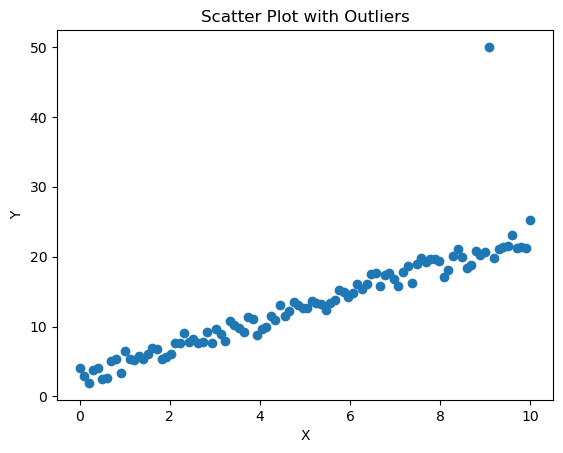

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data (linear data with outliers)
x = np.linspace(0, 10, 100)
y = 2 * x + 3 + np.random.normal(0, 1, 100)
y[90] = 50  # Introduce an outlier

# Create scatter plot
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Outliers')
plt.show()

### Isolation Forest Example

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Generate example data (normal distribution with outliers)
data = np.concatenate([np.random.normal(0, 1, 100), [100, -100]])

# Reshape data for Isolation Forest
data = data.reshape(-1, 1)

# Create Isolation Forest model
model = IsolationForest(contamination=0.05)  # 5% expected outliers

# Fit model and predict outliers
model.fit(data)
outliers = data[model.predict(data) == -1]
print("Isolation Forest Outliers:", outliers)

### Local Outlier Factor (LOF) Example

In [3]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Generate example data (clustered data with outliers)
data = np.concatenate([np.random.normal(0, 1, (50, 2)), np.random.normal(5, 1, (50, 2)), [[10, 10], [-10, -10]]])

# Create LOF model
model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # 10% expected outliers

# Fit model and predict outliers
outliers = data[model.fit_predict(data) == -1]
print("LOF Outliers:", outliers)

LOF Outliers: [[ -0.36957635   2.00675483]
 [ -1.87787294   0.76852764]
 [  1.32743993   1.93188126]
 [ -1.29203559   1.3230006 ]
 [  1.79676727  -1.62954532]
 [ -1.26837162   2.27754366]
 [  6.84313315   6.89680411]
 [  4.10277439   7.02438713]
 [  7.28251386   6.8257411 ]
 [ 10.          10.        ]
 [-10.         -10.        ]]


These examples demonstrate how to use different outlier detection methods in Python using various libraries. You can adapt these examples to your specific data and analysis needs.